<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [32]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [33]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [34]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [35]:
# Answer:
movies['duration'].median()


117.0

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [36]:
# Answer:
movies.sort_values(by='duration',ascending=[True]).head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [37]:
movies.sort_values(by='duration',ascending=[False]).head()

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

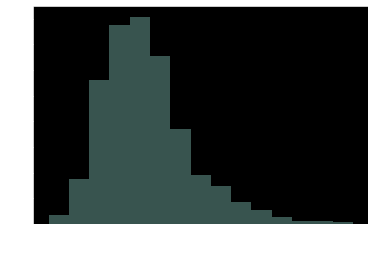

In [57]:
# Answer:
sns.distplot(movies['duration'],  kde=False, bins=15);

#### Use a box plot to display that same data.

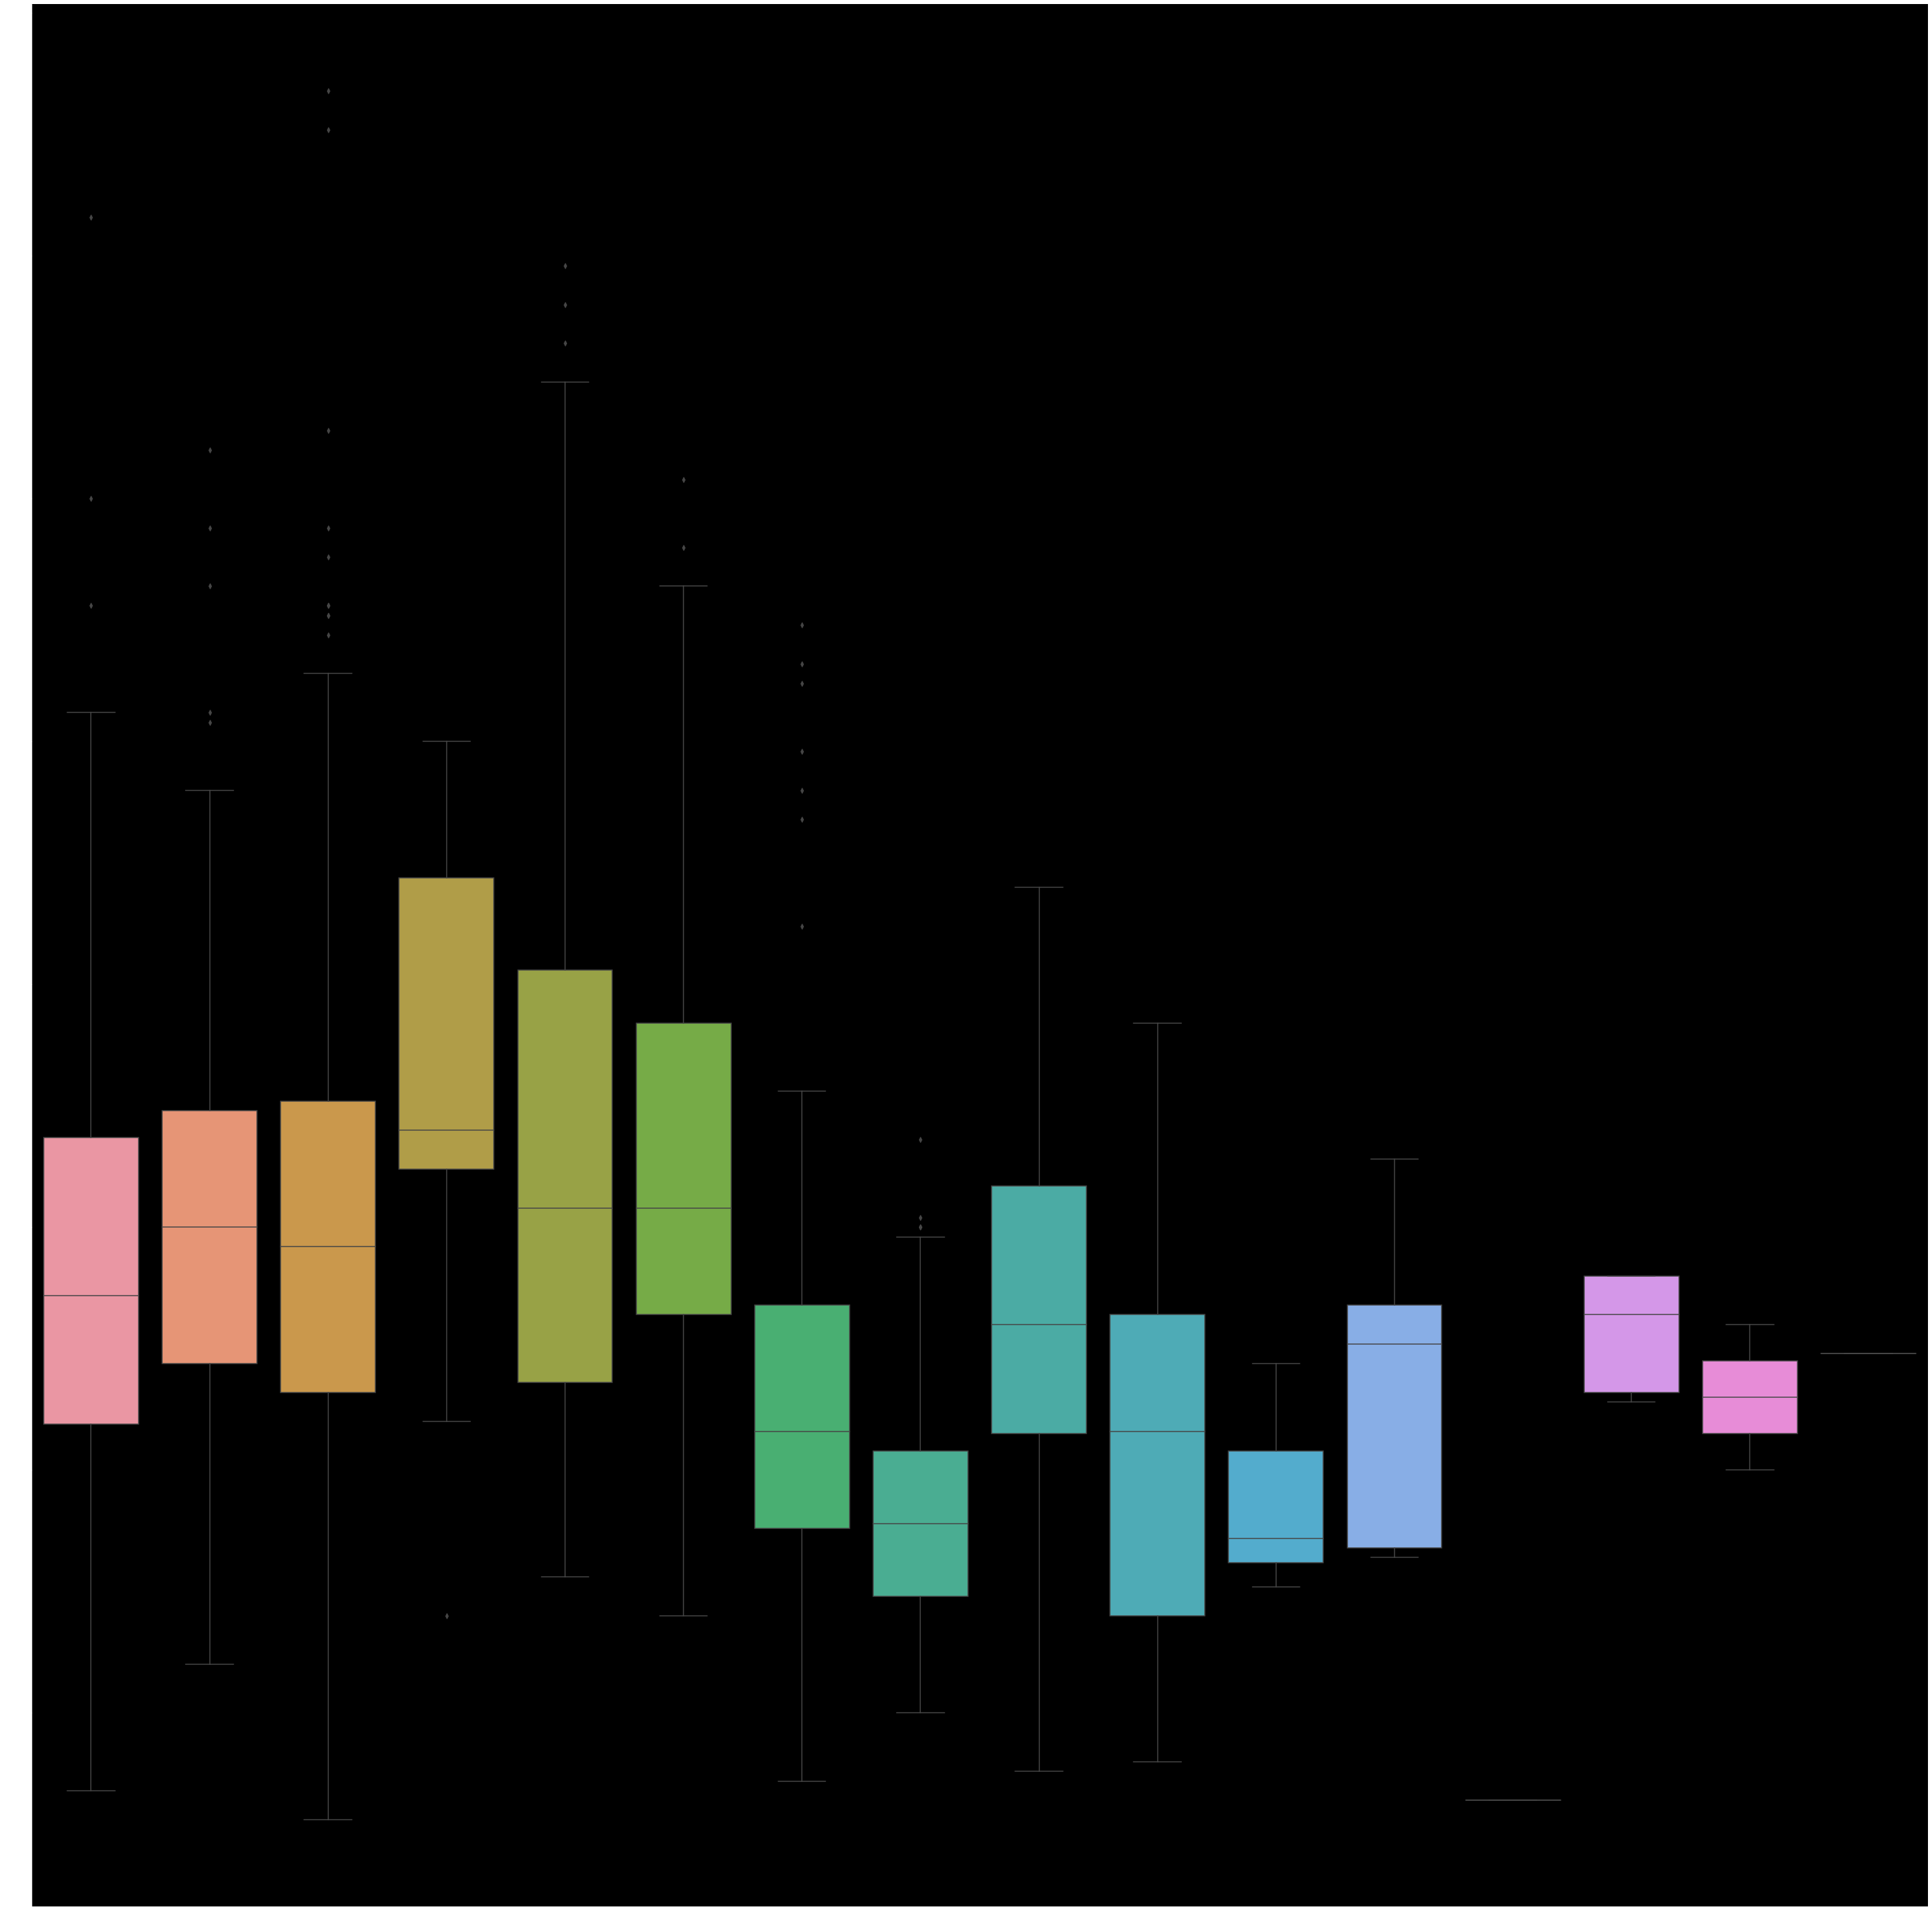

In [58]:
# Answer:

sns.catplot(x='genre',y='duration',data=movies, kind='box' , height=40)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [59]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 0, 'Genre')

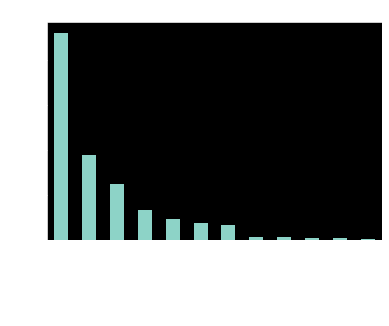

In [71]:
# Answer:
graphic=movies['content_rating'].value_counts().plot(kind='bar')

graphic.title.set_text("Movies and content ratings")
graphic.set_ylabel("Duration")
graphic.set_xlabel("Genre")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [42]:
# Answer:


conditions =[ 
(movies['content_rating'] =='NOT RATED') ,
(movies['content_rating'] =='APPROVED') ,
(movies['content_rating'] =='PASSED') ,
(movies['content_rating'] =='GP') ,

]

results = [    
    'UNRATED',
    'UNRATED',
    'UNRATED',
    'UNRATED',
]

movies['content_rating'] = np.select(conditions,results,movies['content_rating'] )

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [43]:
# Answer:

conditions =[ 
(movies['content_rating'] =='X') ,
(movies['content_rating'] =='TV-MA') ,
]

results = [    
    'NC-17',
    'NC-17',
]

movies['content_rating'] = np.select(conditions,results,movies['content_rating'] )

#### Count the number of missing values in each column.

In [72]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [73]:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [45]:
# Answer:conditions =[ 
(movies['title'] == 'Butch Cassidy and the Sundance Kid'),
(movies['title'] == 'Where Eagles Dare'),
(movies['title'] =='True Grit')
]

results = [    
    'PG-13',
    'PG-13',
    'G'
]

movies['content_rating'] = np.select(conditions,results,movies['content_rating'] )

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [74]:
# Answer:
(movies[movies['duration'] >= 120]['star_rating'].mean()) - (movies[movies['duration'] < 120]['star_rating'].mean())

0.11023201174742514

#### Use a visualization to detect whether there is a relationship between duration and star rating.

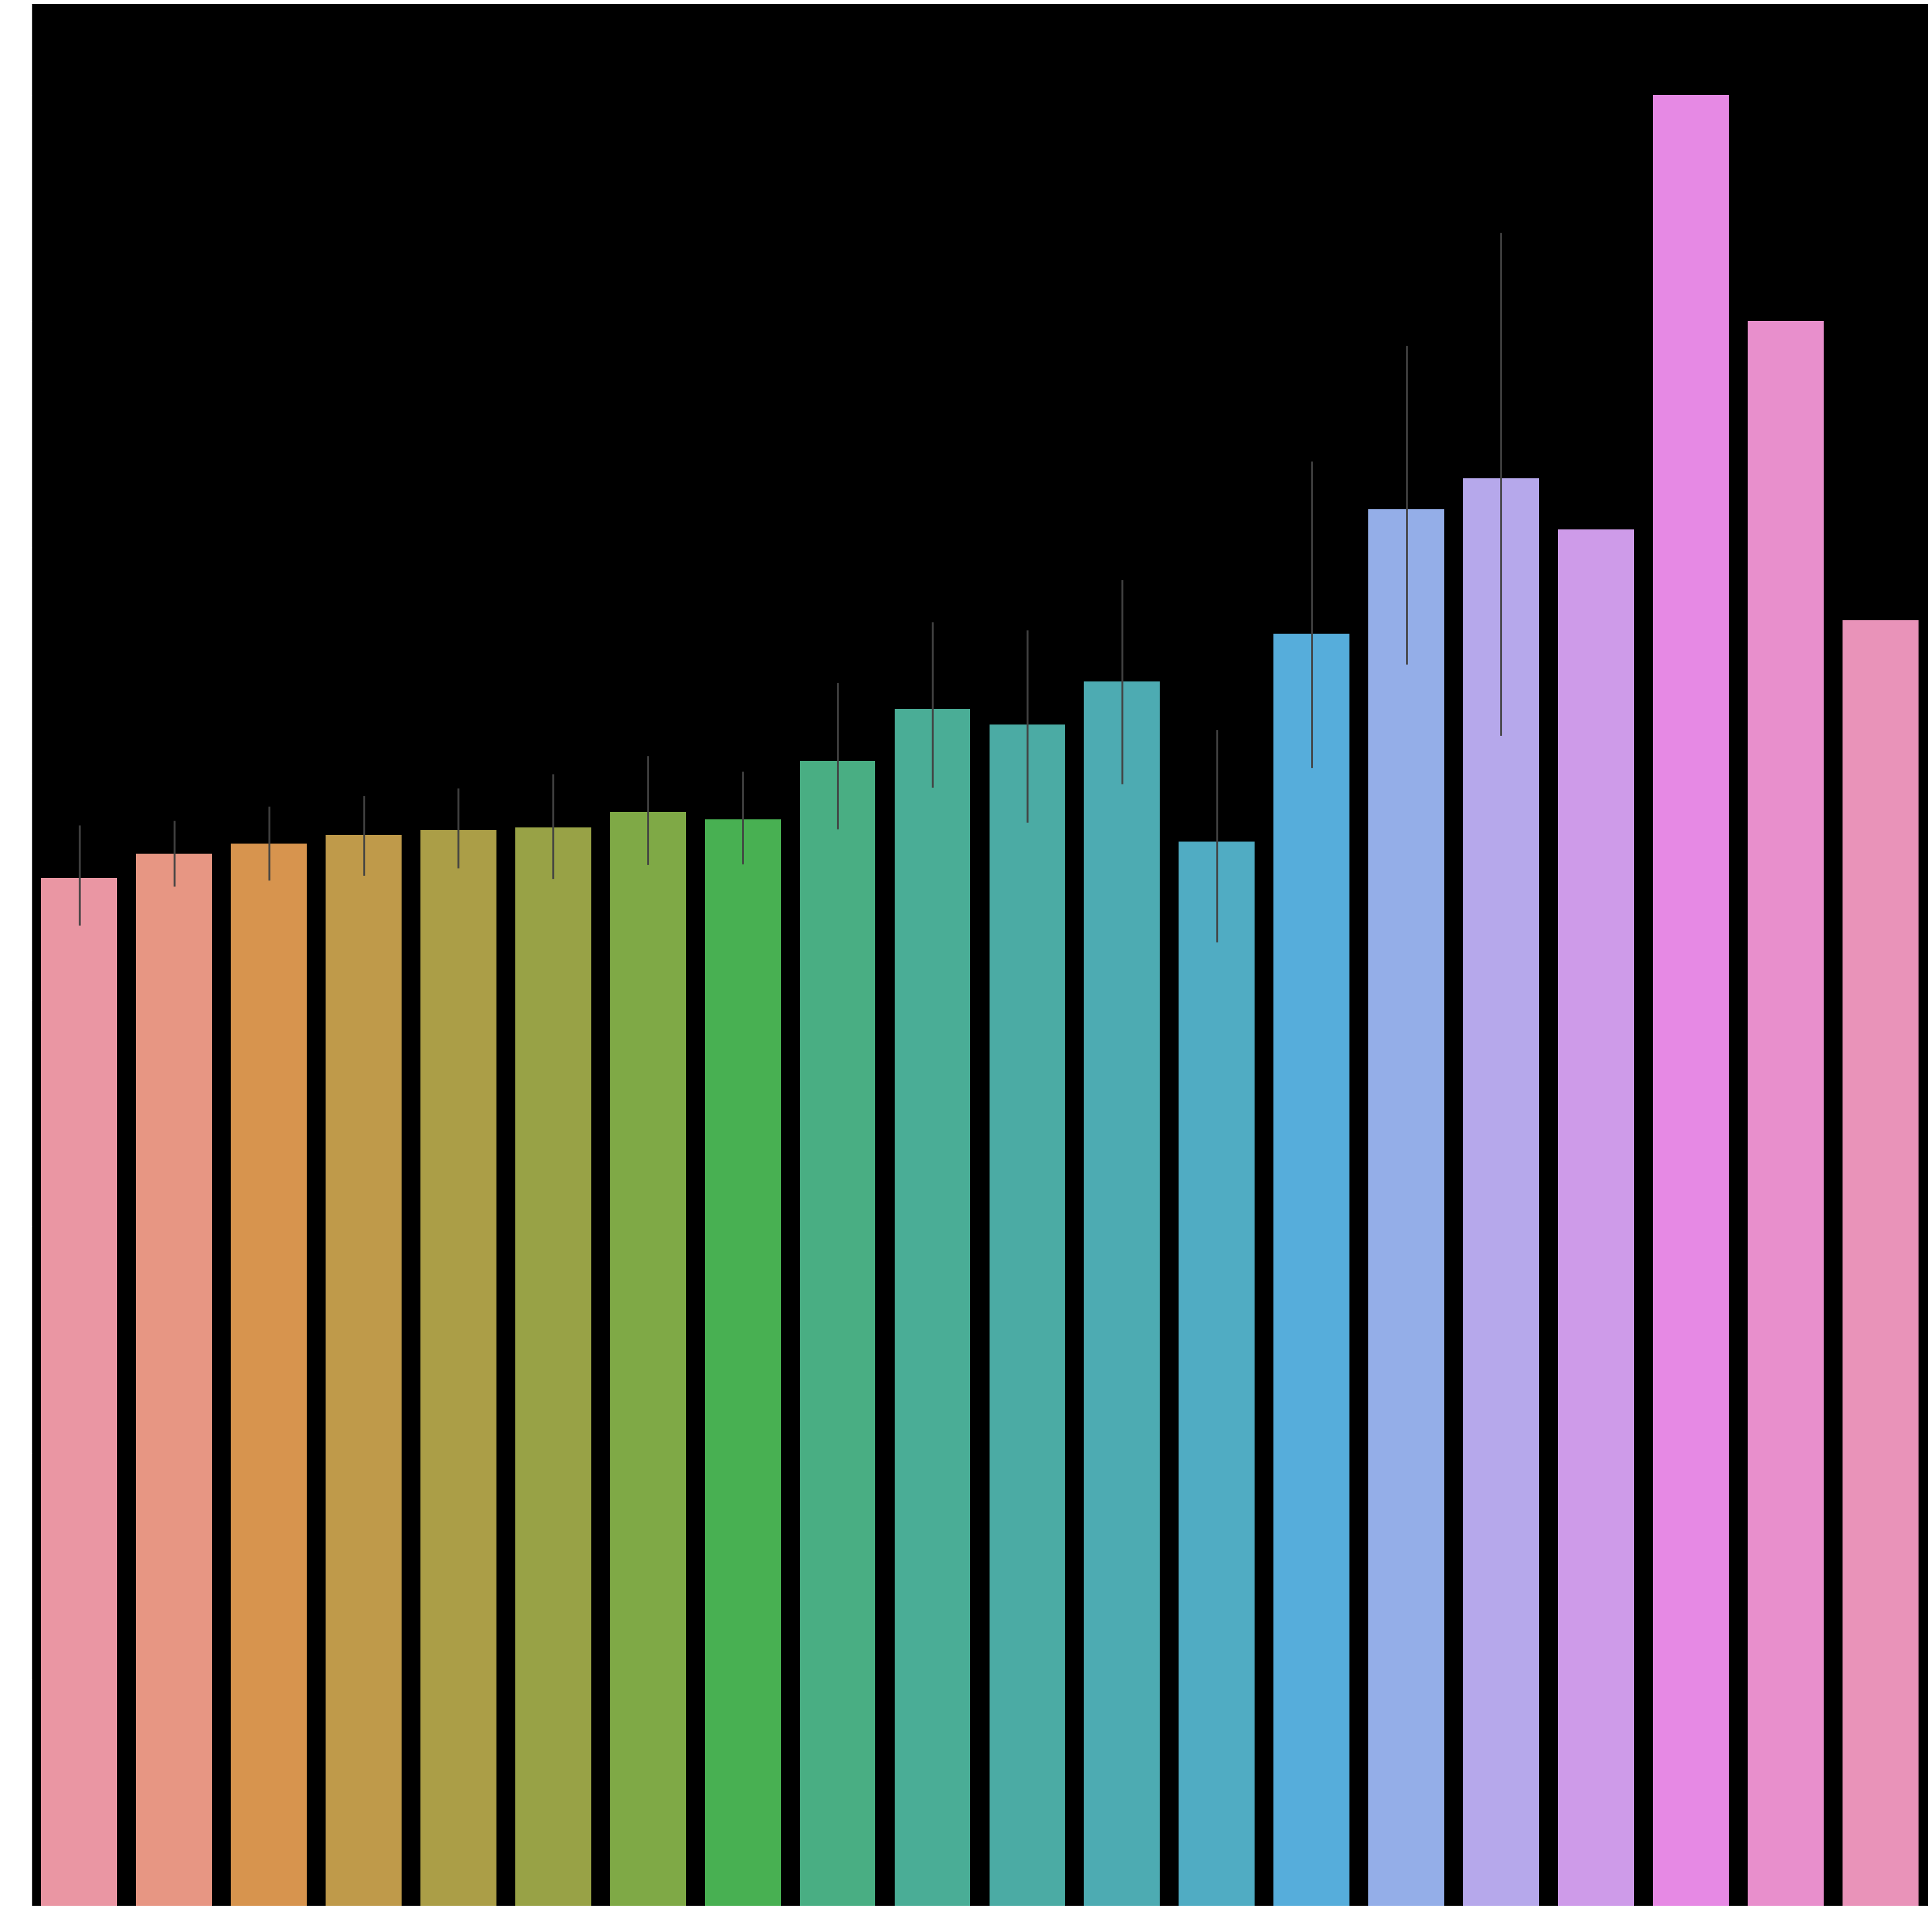

In [75]:
# Answer:

sns.catplot(x='star_rating',y='duration',data=movies, kind='bar', height=40)


#### Calculate the average duration for each genre.

In [77]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

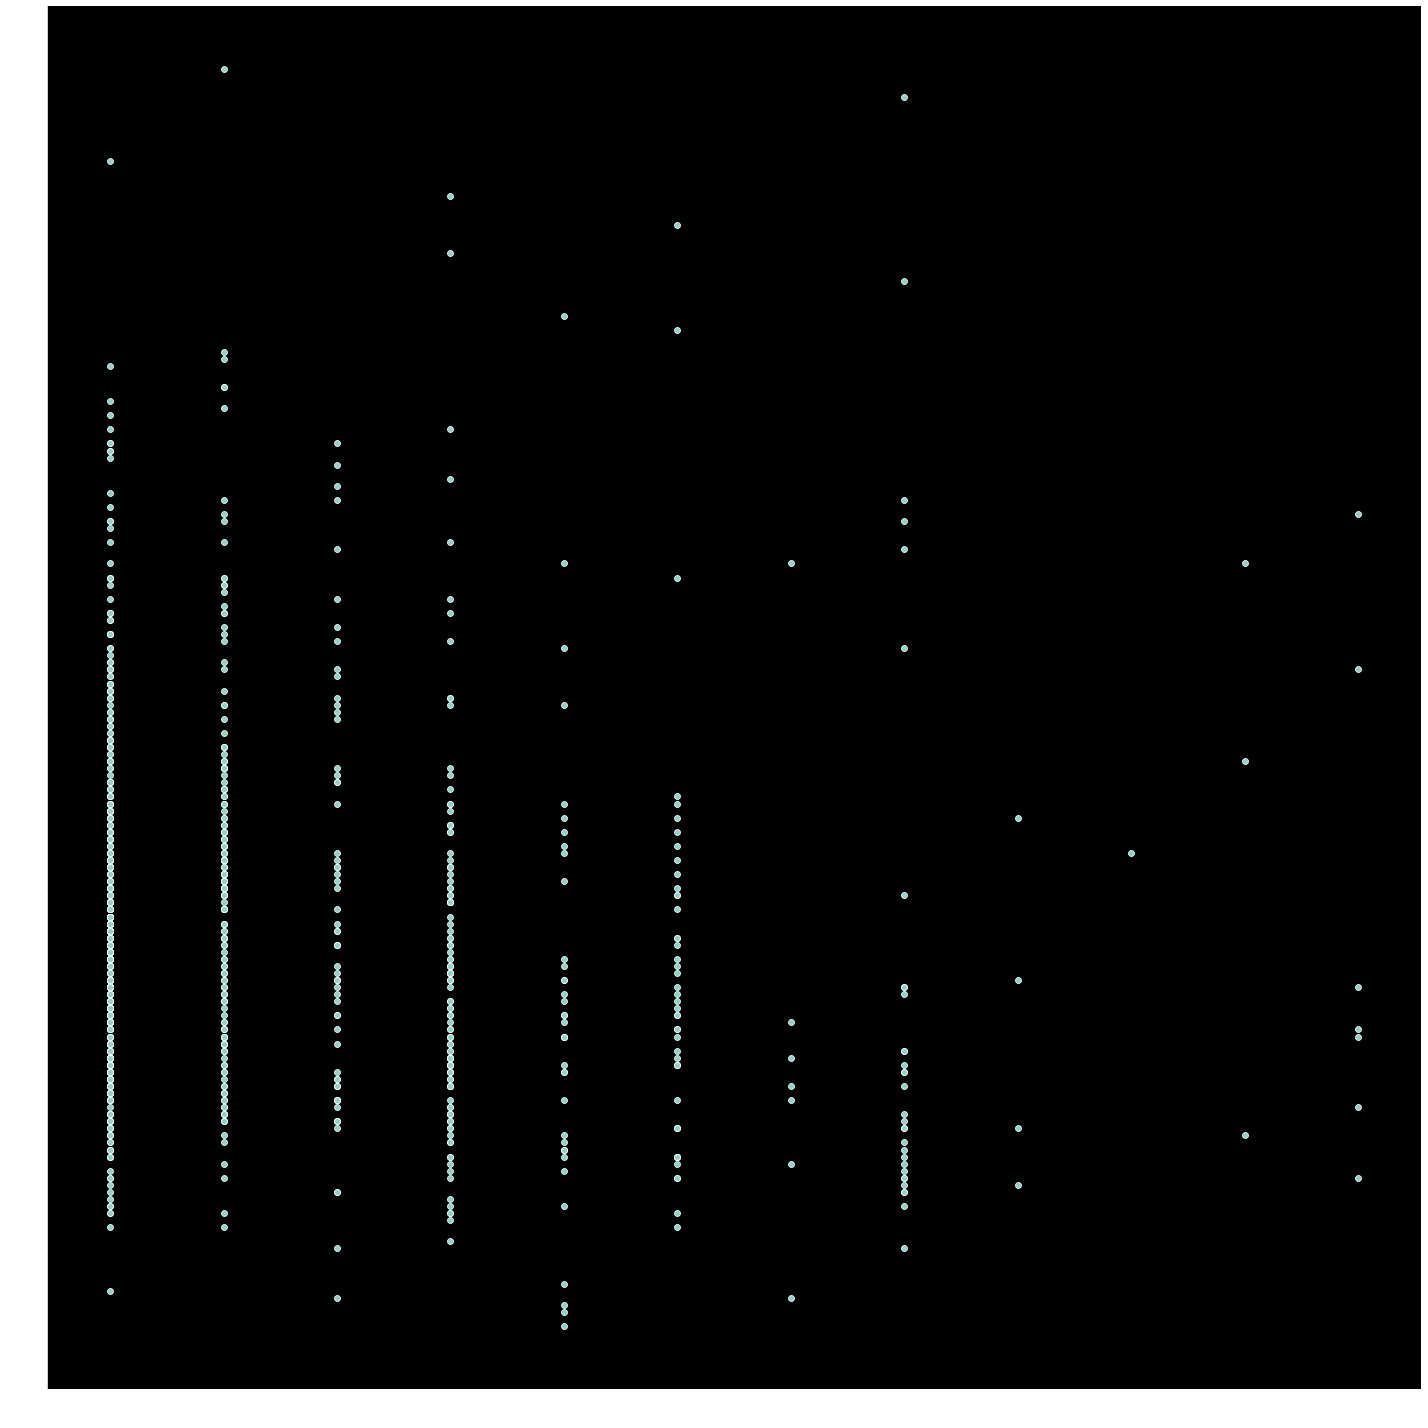

In [76]:
# Answer:
sns.pairplot(movies,x_vars='content_rating', y_vars='duration', height=20)

#### Determine the top rated movie (by star rating) for each genre.

In [78]:
# Answer:
movies.groupby(['genre'])['star_rating','title'].first()

,star_rating,title
genre,,
Action,9.0,The Dark Knight
Adventure,8.9,The Lord of the Rings: The Return of the King
Animation,8.6,Spirited Away
Biography,8.9,Schindler's List
Comedy,8.6,Life Is Beautiful
Crime,9.3,The Shawshank Redemption
Drama,8.9,12 Angry Men
Family,7.9,E.T. the Extra-Terrestrial
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [80]:
# Answer:
movies[movies.duplicated(['title'])]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [81]:

genremovies= movies.groupby('genre').title.count()
genremovies = genremovies[genremovies > 10]
ratings = movies.groupby('genre').star_rating.sum()

genreavg = ratings/genremovies

genreavg

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family            NaN
Fantasy           NaN
Film-Noir         NaN
History           NaN
Horror       7.806897
Mystery      7.975000
Sci-Fi            NaN
Thriller          NaN
Western           NaN
dtype: float64

#### Option 1: manually create a list of relevant genres, then filter using that list

In [82]:
# Answer:

genreslist= ['Sci-fi','Western','Film-Noir','Horror']

genremovies =movies[movies['genre'].isin(genreslist)]

genremovies.groupby(['genre'])['star_rating','title',].first()


,star_rating,title
genre,,
Film-Noir,8.3,The Third Man
Horror,8.6,Psycho
Western,8.9,"The Good, the Bad and the Ugly"


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [53]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [54]:
# Answer:



#### Option 4: aggregate by count and mean, then filter using the count

In [55]:
# Answer:

# Answer:
genremovies= movies.groupby('genre')['star_rating','duration'].agg(['count','mean'])

genremovies[genremovies>137]

## Bonus

#### Figure out something "interesting" using the actors data!

In [83]:
#Actors than appear in various movies
movies.groupby(['genre'])['actors_list'].describe()

,count,unique,top,freq
genre,,,,
Action,136,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...",3
Adventure,75,68,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",6
Animation,62,61,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']",2
Biography,77,77,"[u'Anthony Hopkins', u'John Hurt', u'Anne Banc...",1
Comedy,156,156,"[u'Alec Baldwin', u'Geena Davis', u'Michael Ke...",1
Crime,124,124,"[u'Al Pacino', u'Michelle Pfeiffer', u'Steven ...",1
Drama,278,278,"[u'Ir\xe8ne Jacob', u'Jean-Louis Trintignant',...",1
Family,2,2,"[u'Gene Wilder', u'Jack Albertson', u'Peter Os...",1
Fantasy,1,1,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ...",1


In [84]:
movies[movies['actors_list'].duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
80,8.4,Star Wars: Episode VI - Return of the Jedi,PG,Action,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
414,7.9,Toy Story 2,G,Animation,92,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
642,7.7,Harry Potter and the Deathly Hallows: Part 1,PG-13,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
727,7.6,Harry Potter and the Goblet of Fire,PG-13,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
814,7.6,The Hobbit: The Battle of the Five Armies,PG-13,Adventure,144,"[u'Ian McKellen', u'Martin Freeman', u'Richard..."
891,7.5,Harry Potter and the Half-Blood Prince,PG,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
